In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import plot_tools, input_factory

creating c:\users\shcec\appdata\local\temp\scipy-shcec-oey2vm\python27_intermediate\compiler_e3b0c44298fc1c149afbf4c8996fb924
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 0


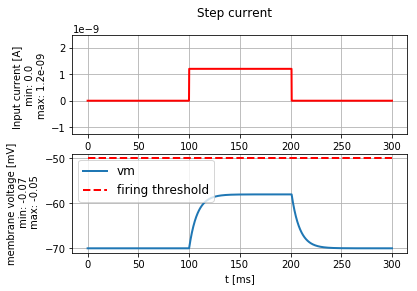

Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 5


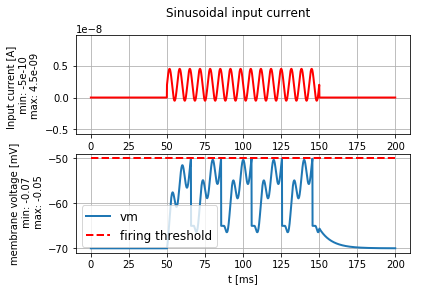

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [2]:
LIF.getting_started()
LIF.print_default_parameters()

In [3]:
help(LIF)

Help on module neurodynex.leaky_integrate_and_fire.LIF in neurodynex.leaky_integrate_and_fire:

NAME
    neurodynex.leaky_integrate_and_fire.LIF

FILE
    c:\users\shcec\.conda\envs\mbnn\lib\site-packages\neurodynex\leaky_integrate_and_fire\lif.py

DESCRIPTION
    This file implements a leaky intergrate-and-fire (LIF) model.
    You can inject a step current or sinusoidal current into
    neuron using LIF_Step() or LIF_Sinus() methods respectively.
    
    Relevant book chapters:
    
    - http://neuronaldynamics.epfl.ch/online/Ch1.S3.html

FUNCTIONS
    get_random_param_set(random_seed=None)
        creates a set of random parameters. All values are constrained to their typical range
        Returns:
            list: a list of (obfuscated) parameters. Use this vector when calling simulate_random_neuron()
    
    getting_started()
        An example to quickly get started with the LIF module.
        Returns:
    
    print_default_parameters()
        Prints the default values
   

In [5]:
help(input_factory)

Help on module neurodynex.tools.input_factory in neurodynex.tools:

NAME
    neurodynex.tools.input_factory

FILE
    c:\users\shcec\.conda\envs\mbnn\lib\site-packages\neurodynex\tools\input_factory.py

DESCRIPTION
    # This file is part of the exercise code repository accompanying
    # the book: Neuronal Dynamics (see http://neuronaldynamics.epfl.ch)
    # located at http://github.com/EPFL-LCN/neuronaldynamics-exercises.

FUNCTIONS
    get_ramp_current(t_start, t_end, unit_time, amplitude_start, amplitude_end, append_zero=True)
        Creates a ramp current. If t_start == t_end, then ALL entries are 0.
        
        Args:
            t_start (int): start of the ramp
            t_end (int): end of the ramp
            unit_time (Brian2 unit): unit of t_start and t_end. e.g. 0.1*brian2.ms
            amplitude_start (Quantity): amplitude of the ramp at t_start. e.g. 3.5*brian2.uamp
            amplitude_end (Quantity): amplitude of the ramp at t_end. e.g. 4.5*brian2.uamp
        

## Exercise: minimal current

### 2.1.1 Question: minimal current (calculation)
default neuron parameters, compute minimal current to elicitate a spike.


$$
U = U_{rest} + IR(1 - \exp^\frac{t_0 - t}{\tau})
$$


this equation is solution for $U$, so we can compute minimal $I_{min}$ needed for splike elicititation like


$$ I_{min} = \frac{U_{threshold} - U_{rest}}{R} $$

In [4]:
i_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / (LIF.MEMBRANE_RESISTANCE)
print('this is a minimal current neede for spike elicitation: ', i_min)

('this is a minimal current neede for spike elicitation: ', 2. * namp)


### 2.1.2 Question: minimal current (simulation)

I'm asked to do some simualtions with minimal current I got in previous step in order to check if I got right answer

Missing compiler_cxx fix for MSVCCompiler
nr of spikes: 0


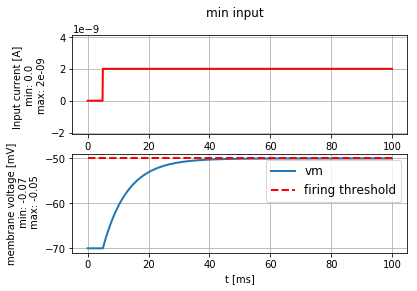

In [6]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(t_start=5, 
                                              t_end=100, 
                                              unit_time=b2.ms,
                                              amplitude=i_min)

# run the LIF model.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,
                                                         simulation_time=100 * b2.ms)
# plot I and Vm
plot_tools.plot_voltage_and_current_traces(state_monitor,
                                           step_current,
                                           title='min input',
                                           firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 2.2 Exercise: f-I Curve

### 2.2.1 Quesion: f-I Curve and refractoryness

1. skectch the f-I curve I expect to see *done it when elicit a formula*
2. What is the maximum rate at which this neuron can fire?
    *I think there is some link to refractoryness, but in lections we did't take it*
3. Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz/ then plot the f-I curve. Pay attension to the low input current.



In [7]:
# recall how to set refractory period
help(LIF.simulate_LIF_neuron)

Help on function simulate_LIF_neuron in module neurodynex.leaky_integrate_and_fire.LIF:

simulate_LIF_neuron(input_current, simulation_time=5. * msecond, v_rest=-70. * mvolt, v_reset=-65. * mvolt, firing_threshold=-50. * mvolt, membrane_resistance=10. * Mohm, membrane_time_scale=8. * msecond, abs_refractory_period=2. * msecond)
    Basic leaky integrate and fire neuron implementation.
    
    Args:
        input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
        simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
        v_rest (Quantity): Resting potential: -70mV
        v_reset (Quantity): Reset voltage after spike - 65mV
        firing_threshold (Quantity) Voltage threshold for spiking -50mV
        membrane_resistance (Quantity): 10Mohm
        membrane_time_scale (Quantity): 8ms
        abs_refractory_period (Quantity): 2ms
    
    Returns:
        StateMonitor: Brian2 StateMonitor for the membrane vo

In [8]:
help(b2.SpikeMonitor)

Help on class SpikeMonitor in module brian2.monitors.spikemonitor:

class SpikeMonitor(EventMonitor)
 |  Record spikes from a `NeuronGroup` or other spike source.
 |  
 |  The recorded spikes can be accessed in various ways (see Examples below):
 |  the attributes `~SpikeMonitor.i` and `~SpikeMonitor.t` store all the indices
 |  and spike times, respectively. Alternatively, you can get a dictionary
 |  mapping neuron indices to spike trains, by calling the `spike_trains`
 |  method. If you record additional variables with the ``variables`` argument,
 |  these variables can be accessed by their name (see Examples).
 |  
 |  Parameters
 |  ----------
 |  source : (`NeuronGroup`, `SpikeSource`)
 |      The source of spikes to record.
 |  variables : str or sequence of str, optional
 |      Which variables to record at the time of the spike (in addition to the
 |      index of the neuron). Can be the name of a variable or a list of names.
 |  record : bool, optional
 |      Whether or not 

In [9]:
help(input_factory)

Help on module neurodynex.tools.input_factory in neurodynex.tools:

NAME
    neurodynex.tools.input_factory

FILE
    c:\users\shcec\.conda\envs\mbnn\lib\site-packages\neurodynex\tools\input_factory.py

DESCRIPTION
    # This file is part of the exercise code repository accompanying
    # the book: Neuronal Dynamics (see http://neuronaldynamics.epfl.ch)
    # located at http://github.com/EPFL-LCN/neuronaldynamics-exercises.

FUNCTIONS
    get_ramp_current(t_start, t_end, unit_time, amplitude_start, amplitude_end, append_zero=True)
        Creates a ramp current. If t_start == t_end, then ALL entries are 0.
        
        Args:
            t_start (int): start of the ramp
            t_end (int): end of the ramp
            unit_time (Brian2 unit): unit of t_start and t_end. e.g. 0.1*brian2.ms
            amplitude_start (Quantity): amplitude of the ramp at t_start. e.g. 3.5*brian2.uamp
            amplitude_end (Quantity): amplitude of the ramp at t_end. e.g. 4.5*brian2.uamp
        

In [37]:
help(b2.namp)

Help on Unit in module brian2.units.fundamentalunits object:

class Unit(Quantity)
 |   A physical unit.
 |  
 |   Normally, you do not need to worry about the implementation of
 |   units. They are derived from the `Quantity` object with
 |   some additional information (name and string representation).
 |   
 |   Basically, a unit is just a number with given dimensions, e.g.
 |   mvolt = 0.001 with the dimensions of voltage. The units module
 |   defines a large number of standard units, and you can also define
 |   your own (see below).
 |  
 |   The unit class also keeps track of various things that were used
 |   to define it so as to generate a nice string representation of it.
 |   See below.
 |  
 |   When creating scaled units, you can use the following prefixes:
 |  
 |    ======     ======  ==============
 |    Factor     Name    Prefix
 |    ======     ======  ==============
 |    10^24      yotta   Y
 |    10^21      zetta   Z
 |    10^18      exa     E
 |    10^15      pe

In [40]:
simulation_time = 500 * b2.ms
num_sim = 100
step_currs = [input_factory.get_step_current(t_start=0,
                                             t_end=500,
                                             unit_time=b2.ms,
                                             amplitude=i * b2.namp,
                                             ) for i in np.linspace(0, 100, num=num_sim)]

spikes = [LIF.simulate_LIF_neuron(step_curr, simulation_time=simualtion_time) for step_curr in step_currs]
frequencies = [monitor[1].count[0] / simulation_time for monitor in spikes]

Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCC

Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCC

Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCC

Text(0,0.5,'f - frequency of spiking')

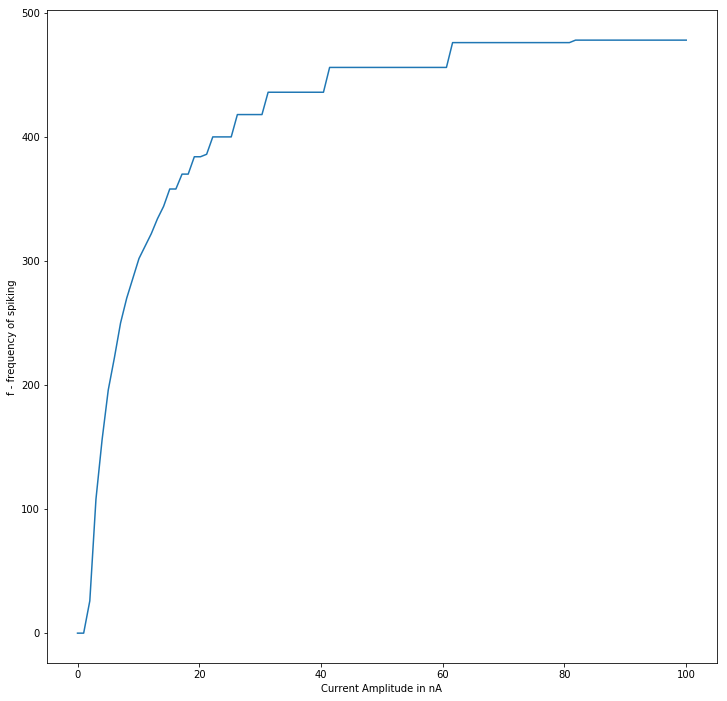

In [42]:
plt.figure(figsize=(12, 12))
plt.plot(np.linspace(0, 100, num=num_sim), frequencies)
plt.xlabel('Current Amplitude in nA')
plt.ylabel('f - frequency of spiking')

In [26]:
help(plot_tools.plot_voltage_and_current_traces)

Help on function plot_voltage_and_current_traces in module neurodynex.tools.plot_tools:

plot_voltage_and_current_traces(voltage_monitor, current, title=None, firing_threshold=None, legend_location=0)
    plots voltage and current .
    
    Args:
        voltage_monitor (StateMonitor): recorded voltage
        current (TimedArray): injected current
        title (string, optional): title of the figure
        firing_threshold (Quantity, optional): if set to a value, the firing threshold is plotted.
        legend_location (int): legend location. default = 0 (="best")
    
    Returns:
        the figure



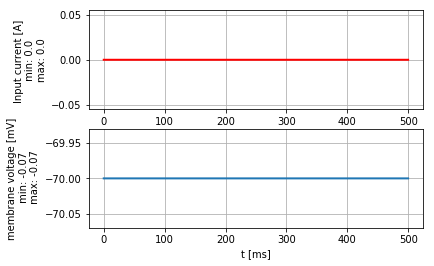

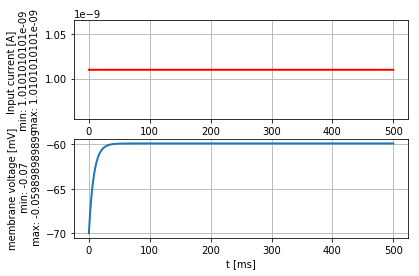

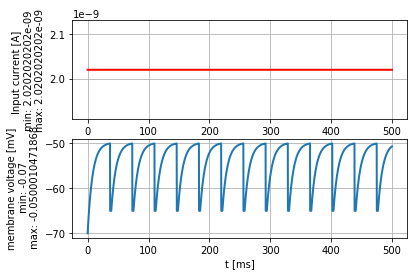

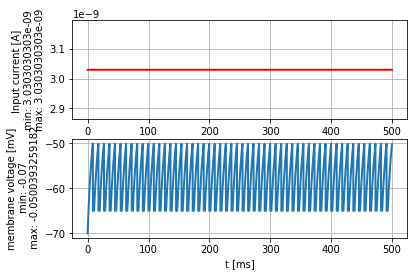

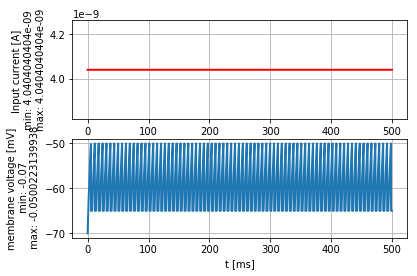

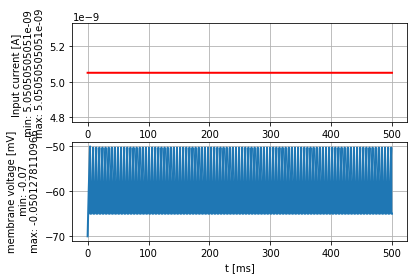

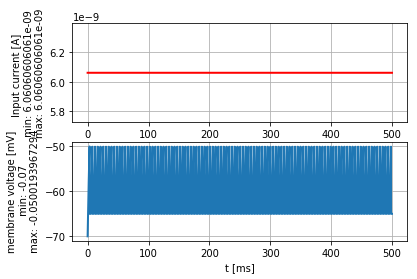

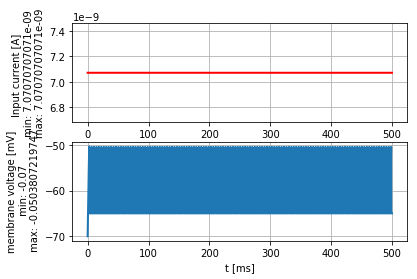

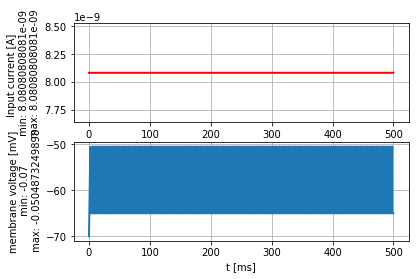

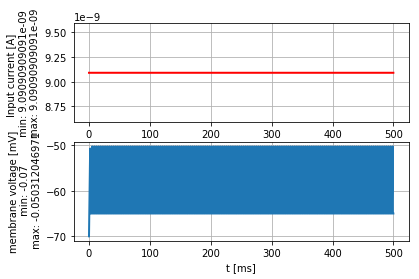

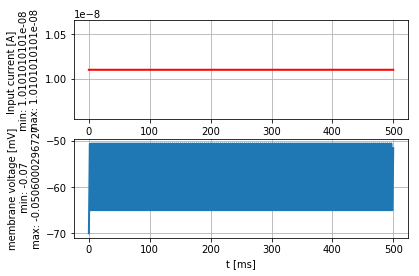

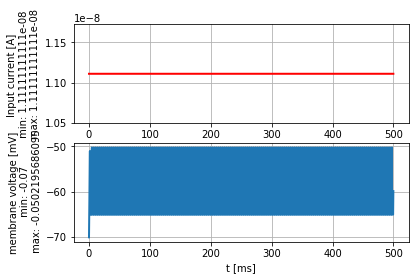

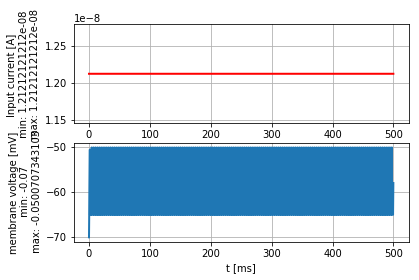

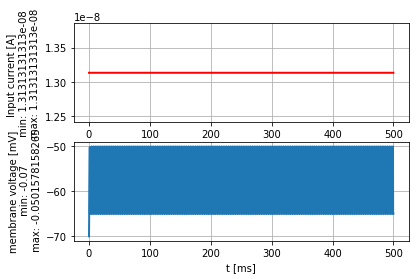

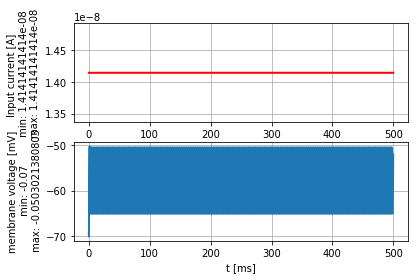

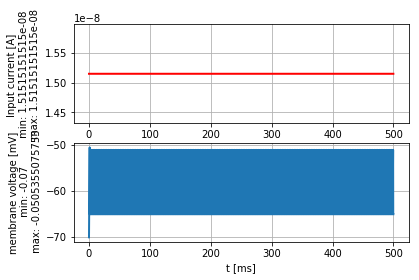

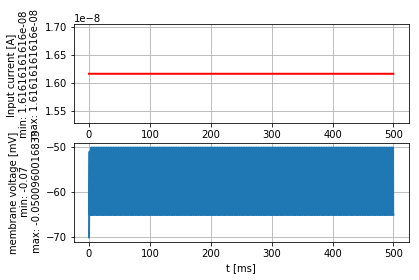

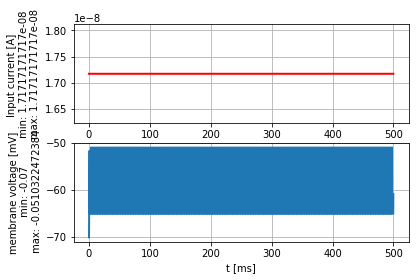

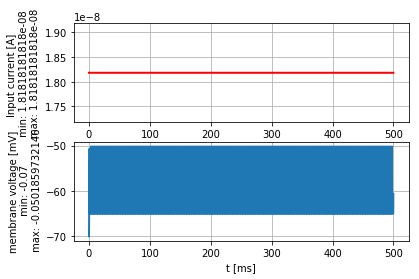

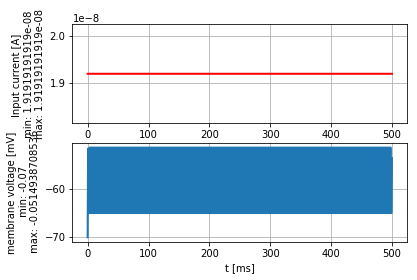

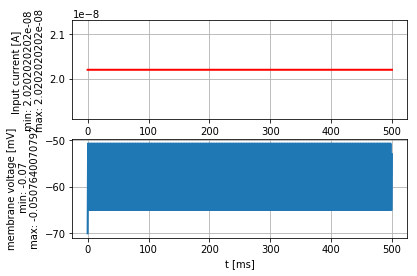

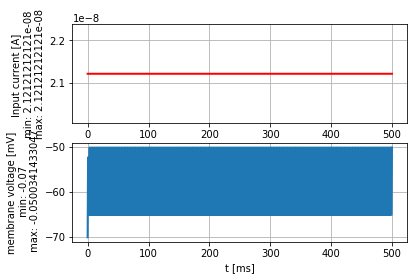

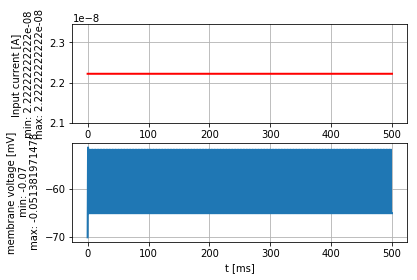

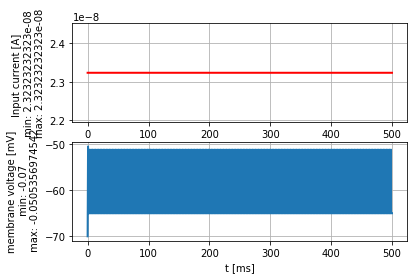

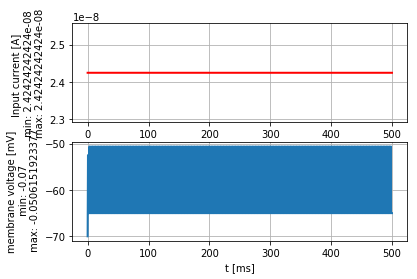

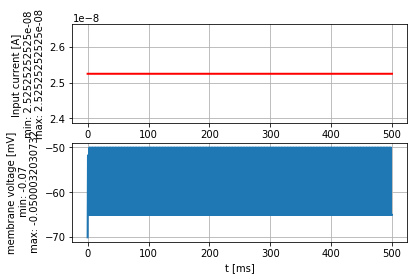

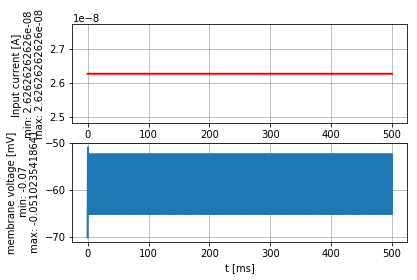

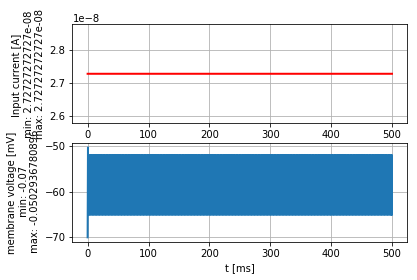

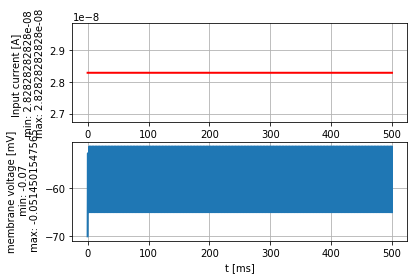

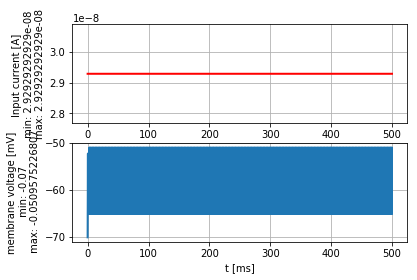

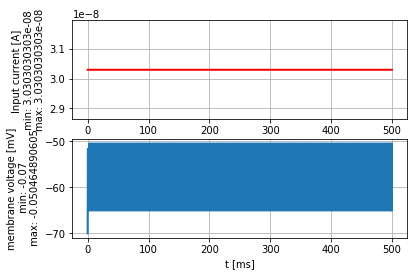

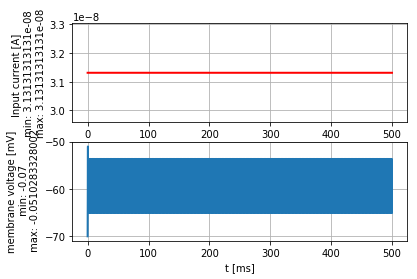

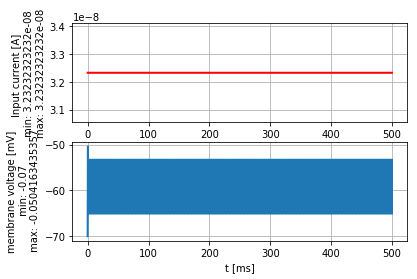

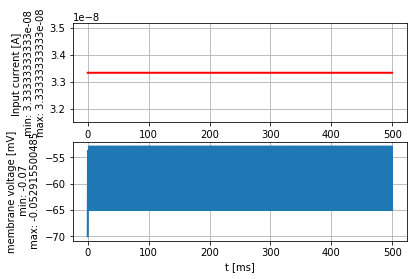

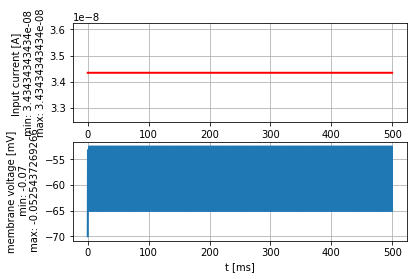

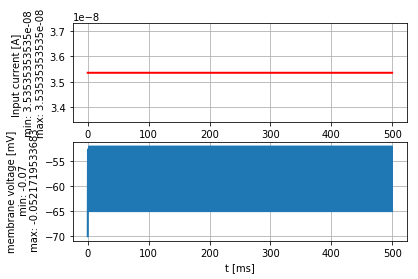

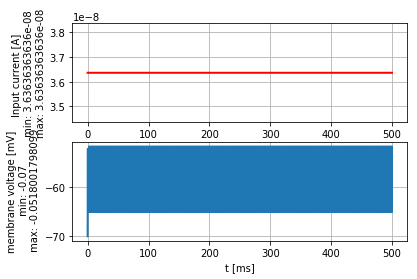

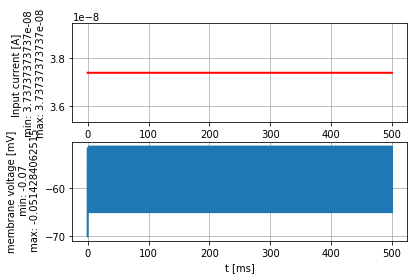

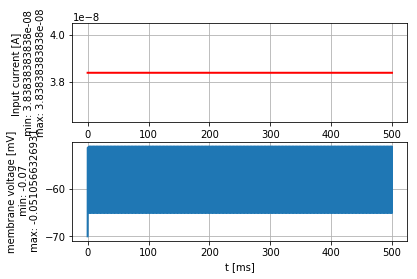

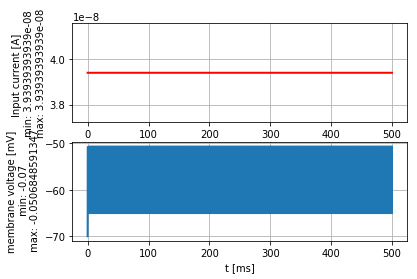

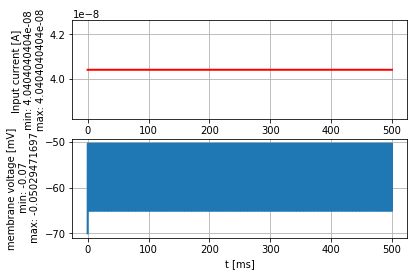

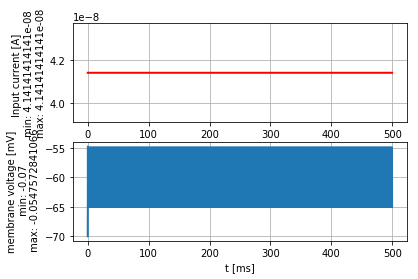

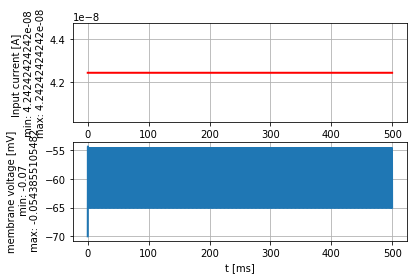

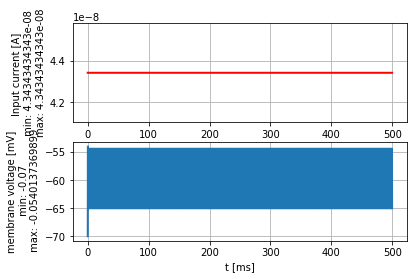

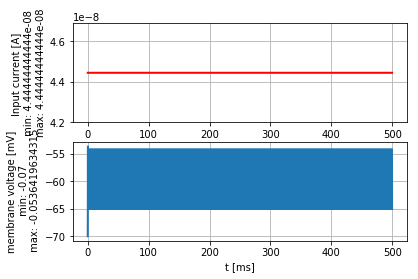

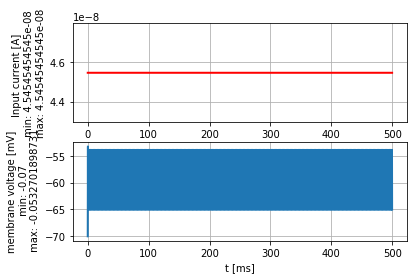

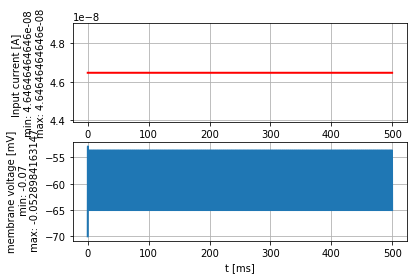

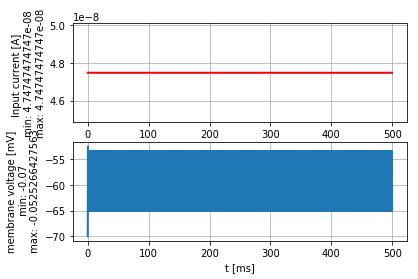

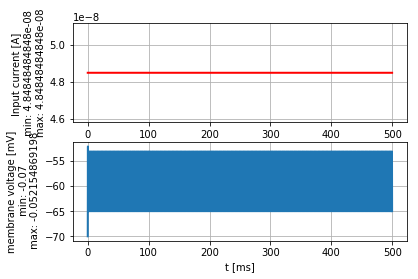

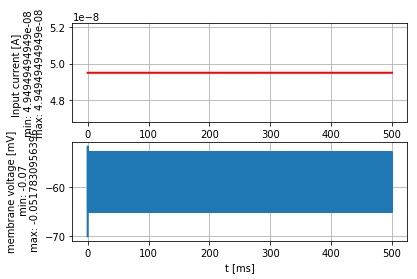

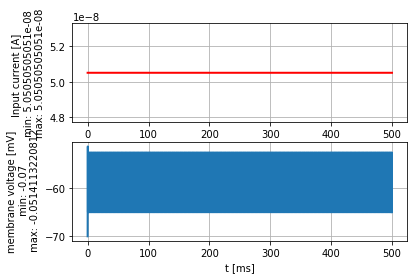

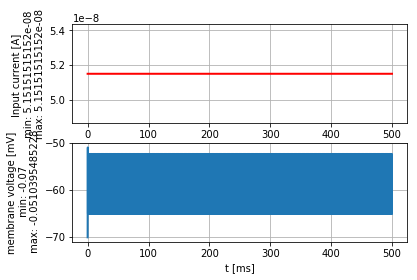

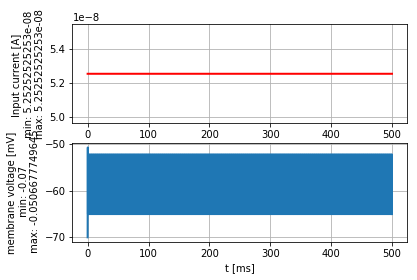

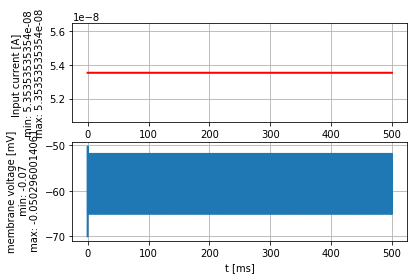

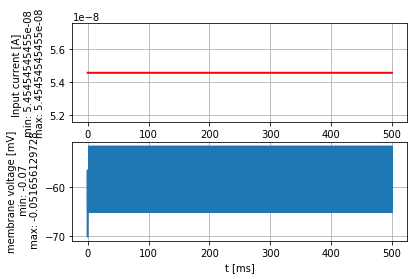

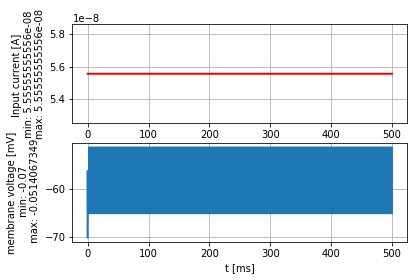

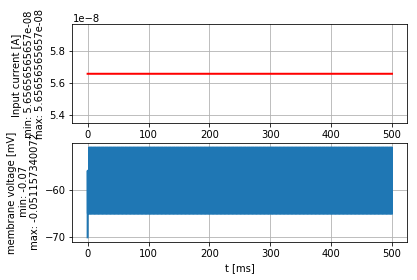

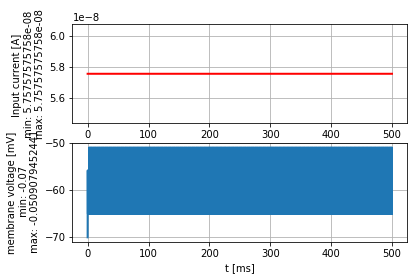

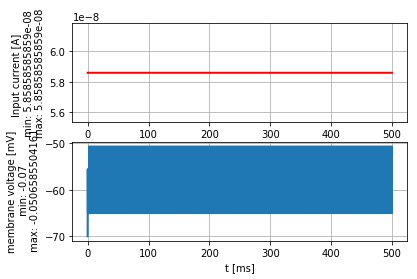

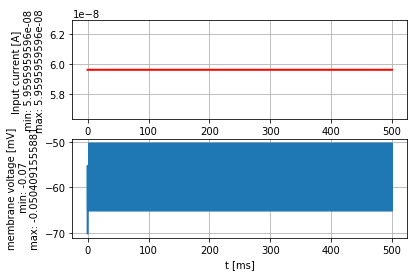

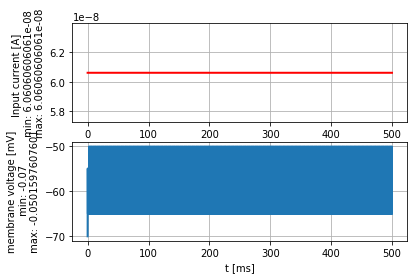

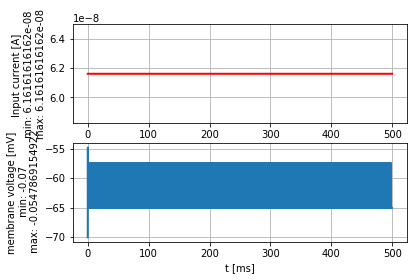

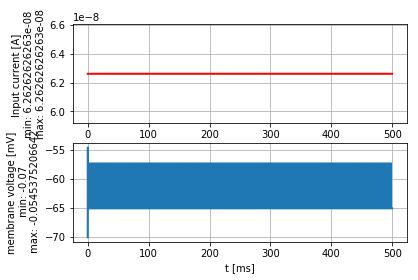

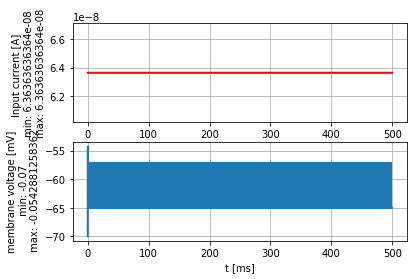

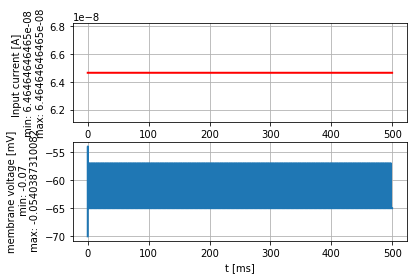

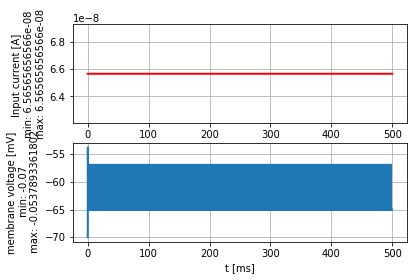

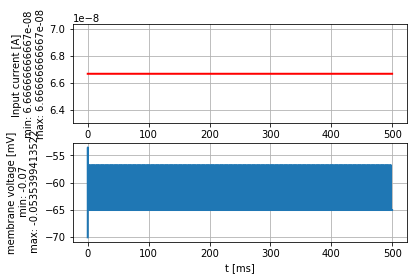

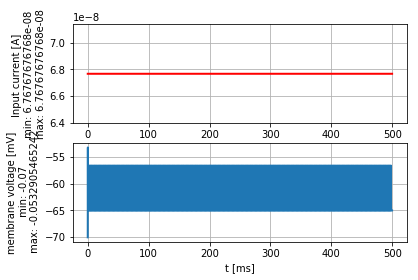

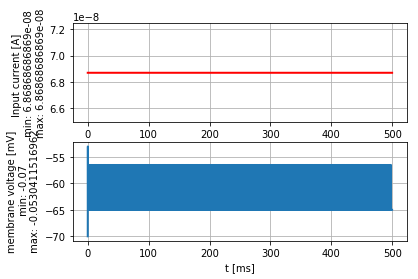

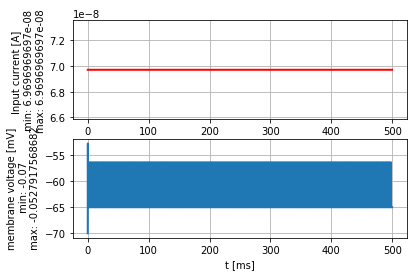

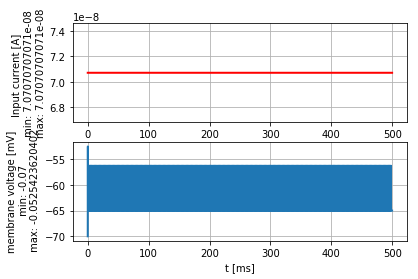

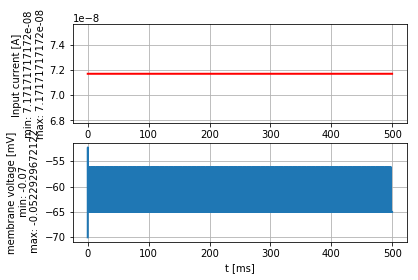

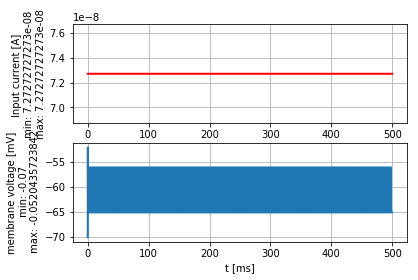

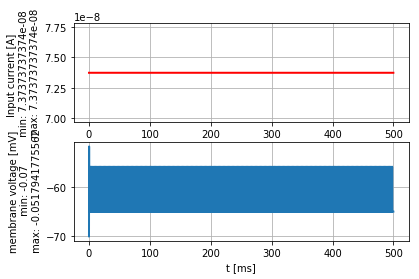

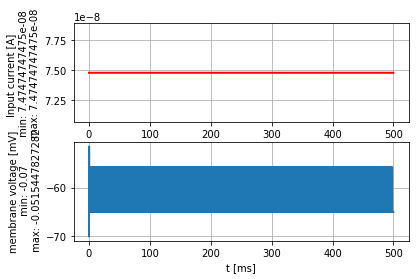

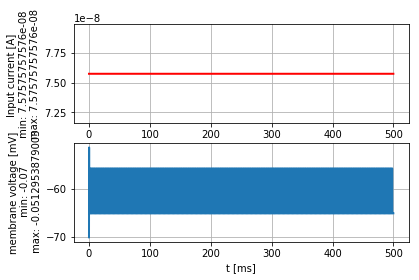

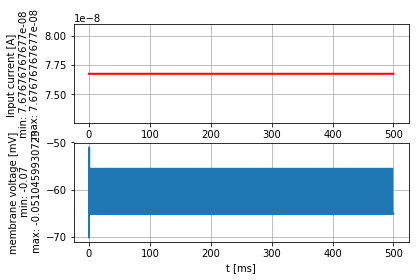

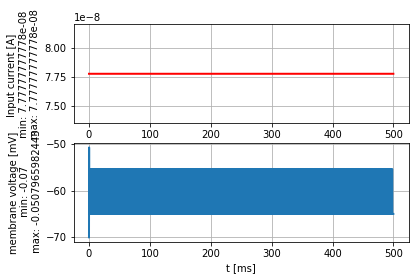

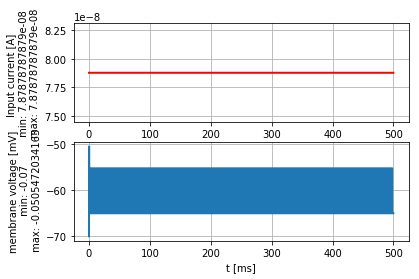

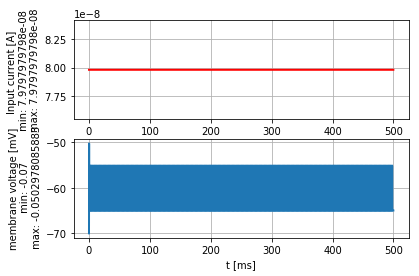

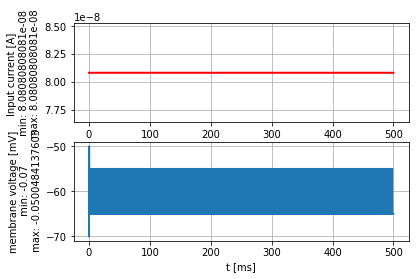

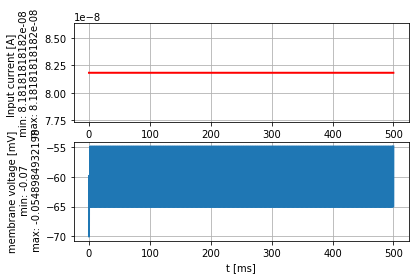

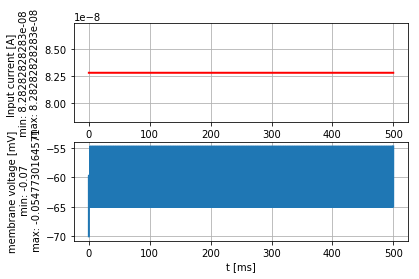

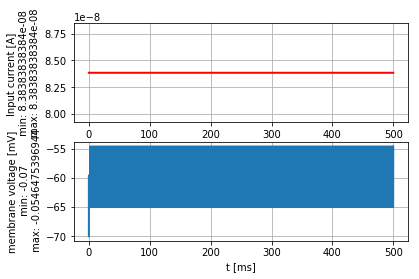

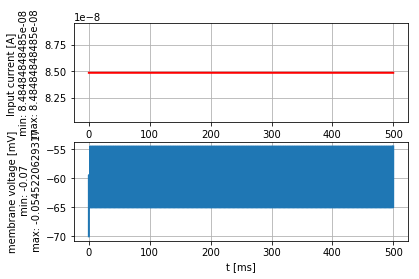

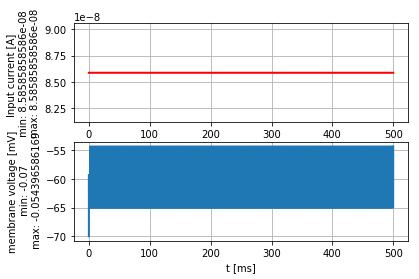

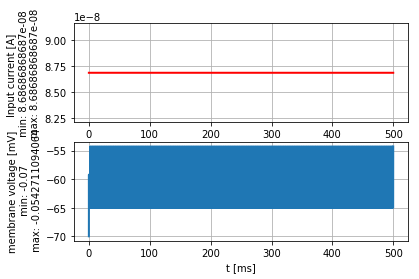

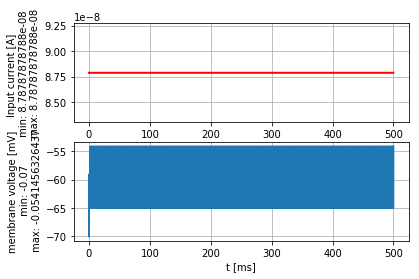

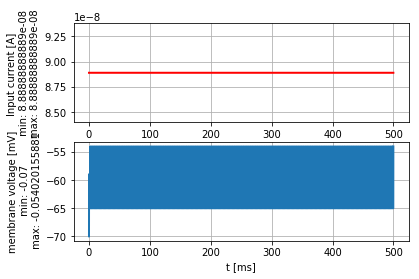

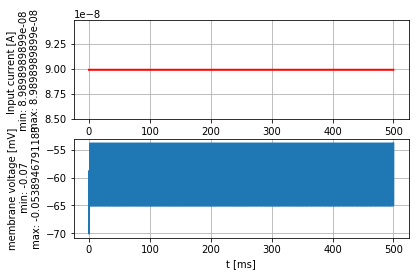

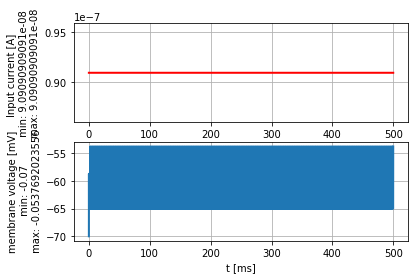

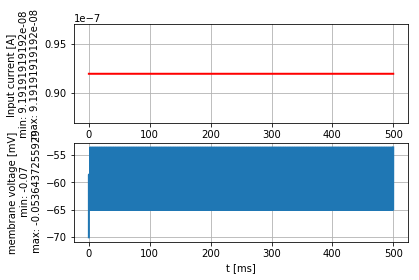

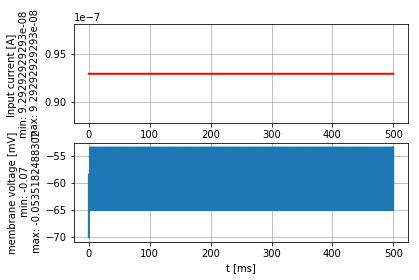

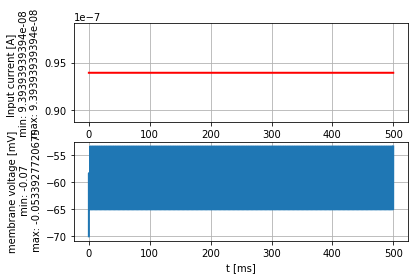

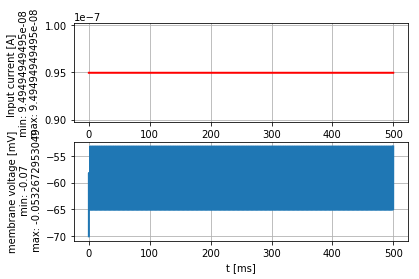

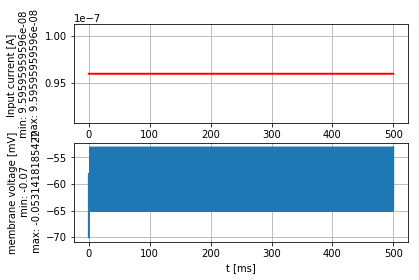

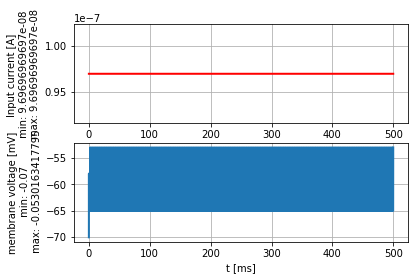

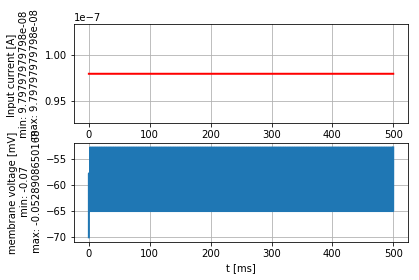

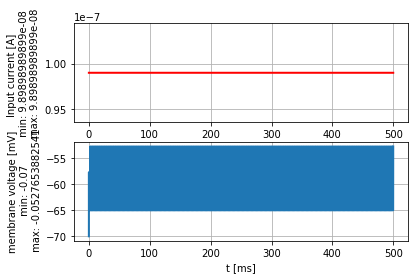

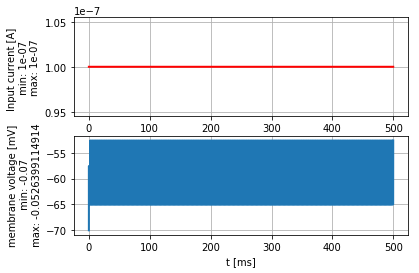

In [43]:
state_monitor = [spike[0] for spike in spikes]
for state, input_cur in zip(state_monitor, step_currs):
    plt.figure()
    plot_tools.plot_voltage_and_current_traces(state, input_cur)

## Exercise: "Experimentally" estimate the parameters of a LIF neuron
### 2.3.1. Question: "read" the LIF parameters ou of the vm plot

In [44]:
# get a random parameter set
random_parameters = LIF.get_random_param_set(random_seed=432)

# imput current of my choice
test_current = input_factory.get_step_current(t_start=15, t_end=35, unit_time=b2.ms, amplitude=23 * b2.namp)
(state_monitor, spike_monitor) = LIF.simulate_random_neuron(test_current, random_parameters)

Missing compiler_cxx fix for MSVCCompiler


(<matplotlib.axes._subplots.AxesSubplot at 0x304a1978>,
 <matplotlib.axes._subplots.AxesSubplot at 0xaa737b8>)

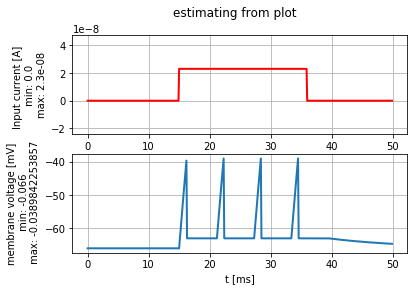

In [47]:
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title='estimating from plot')

In [45]:
help(plot_tools.plot_voltage_and_current_traces)

Help on function plot_voltage_and_current_traces in module neurodynex.tools.plot_tools:

plot_voltage_and_current_traces(voltage_monitor, current, title=None, firing_threshold=None, legend_location=0)
    plots voltage and current .
    
    Args:
        voltage_monitor (StateMonitor): recorded voltage
        current (TimedArray): injected current
        title (string, optional): title of the figure
        firing_threshold (Quantity, optional): if set to a value, the firing threshold is plotted.
        legend_location (int): legend location. default = 0 (="best")
    
    Returns:
        the figure



### Exercise 2.4
#### 2.4.1
Subtthreshold regime